### Import the pandas module

In [1]:
import pandas as pd
pd?

Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)

Type:        module
String form: <module 'pandas' from '/apps/all/Anaconda3/2022.05/lib/python3.9/site-packages/pandas/__init__.py'>
File:        /apps/all/Anaconda3/2022.05/lib/python3.9/site-packages/pandas/__init__.py
Docstring:  
pandas - a powerful data analysis and manipulation library for Python

**pandas** is a Python package providing fast, flexible, and expressive data
structures designed to make working with "relational" or "labeled" data both
easy and intuitive. It aims to be the fundamental high-level building block for
doing practical, **real world** data analysis in Python. Additionally, it has
the broader goal of becoming **the most powerful and flexible open source data
analysis / manipulation tool available in any language**. It is already well on
its way toward this goal.

Main Features
-------------
Here are just a few of the things that pandas does well:

  - Easy handling of missing data in floating point as well as non-floating
    point data.
  - Size mutability

In [2]:
file = "TOP500_202306.xlsx"

### Read the excelt file with ``pd.read_excel``

In [3]:
ds = pd.read_excel(file)

### View which columns there are in the excel spreadsheet by calling ds.columns or ds.keys

In [4]:
ds.columns # or ds.keys()

Index(['Rank', 'Previous Rank', 'First Appearance', 'First Rank', 'Name',
       'Computer', 'Site', 'Manufacturer', 'Country', 'Year', 'Segment',
       'Total Cores', 'Accelerator/Co-Processor Cores', 'Rmax [TFlop/s]',
       'Rpeak [TFlop/s]', 'Nmax', 'Nhalf', 'HPCG [TFlop/s]', 'Power (kW)',
       'Power Source', 'Energy Efficiency [GFlops/Watts]', 'Memory',
       'Architecture', 'Processor', 'Processor Technology',
       'Processor Speed (MHz)', 'Operating System', 'OS Family',
       'Accelerator/Co-Processor', 'Cores per Socket', 'Processor Generation',
       'System Model', 'System Family', 'Interconnect Family', 'Interconnect',
       'Continent', 'Site ID', 'System ID'],
      dtype='object')

### We can easilly plot the contents of each column by first getting the column we wish, i.e. the ``Rmax [TFlop/s]`` and then simply calling calling ``plot`` on the data.

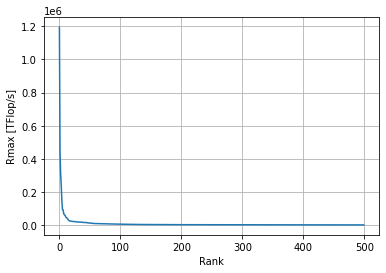

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
ds['Rmax [TFlop/s]'].plot()
# If we wish to set labels, we can do that the following way
plt.ylabel('Rmax [TFlop/s]')
plt.xlabel('Rank')
plt.grid()
plt.show()

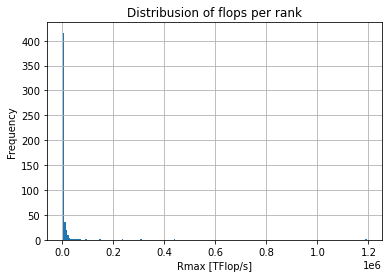

In [6]:
ds['Rmax [TFlop/s]'].plot(kind='hist', bins=200)
plt.xlabel('Rmax [TFlop/s]')
plt.ylabel('Frequency')
plt.title('Distribusion of flops per rank')
plt.grid()
plt.show()

### To get list of processor used in HPC-s we can use the ``value_counts`` on the ``Processor Generation`` column.

In [7]:
ds['Processor Generation'].value_counts()

Xeon Gold (Skylake)                  99
Xeon Gold 62xx (Cascade Lake)        91
AMD Zen-2 (Rome)                     63
AMD Zen-3 (Milan)                    58
Xeon Platinum 82xx (Cascade Lake)    44
Xeon Platinum 83xx (Ice Lake)        35
Intel Xeon E5 (Broadwell)            23
Xeon Platinum (Skylake)              23
Intel Xeon E5 (Haswell)              12
Intel Xeon E5 (IvyBridge)             7
Intel Xeon Phi                        7
IBM POWER9                            7
Xeon Platinum (Sapphire Rapids)       6
Fujitsu A64FX                         6
Xeon Platinum 92xx (Cascade Lake)     6
Vector Engine                         4
Xeon Silver (Skylake)                 3
Sunway                                1
Hygon Dhyana                          1
Xeon Gold (Sapphire Rapids)           1
Xeon Gold 42xx (Cascade Lake)         1
Xeon 5600-series (Westmere-EP)        1
Intel Xeon E5 (SandyBridge)           1
Name: Processor Generation, dtype: int64

Let's check how many HPCs contain NVIDIA coprocessors.

In [8]:
coprocessors = ds['Accelerator/Co-Processor']
coprocessors.value_counts()

None                                     315
NVIDIA Tesla V100                         61
NVIDIA A100                               27
NVIDIA A100 SXM4 40 GB                    18
AMD Instinct MI250X                       10
NVIDIA Tesla V100 SXM2                    10
NVIDIA Tesla A100 80G                     10
NVIDIA Tesla A100 40G                      9
NVIDIA A100 SXM4 80 GB                     7
NVIDIA H100                                5
NVIDIA Tesla P100                          5
NVIDIA Volta GV100                         4
NVIDIA A100 SXM4 64 GB                     2
NVIDIA Tesla K40                           2
Nvidia Volta V100                          1
AMD Instinct MI210 64 GB                   1
NVIDIA Tesla P100 NVLink                   1
Deep Computing Processor                   1
Matrix-2000                                1
NVIDIA Tesla K20x                          1
NVIDIA Tesla K40/Intel Xeon Phi 7120P      1
NVIDIA Tesla K80                           1
NVIDIA 205

In [9]:
NVIDIA_sum = 0
None_sum = 0
Other_sum = 0

for key in coprocessors:
    if 'NVIDIA' in key:
        NVIDIA_sum += 1
    elif key == 'None':
        None_sum += 1

Other_sum = 500 - None_sum - NVIDIA_sum
print(f'Number of HPCs that use NVIDIA coprocessors: {NVIDIA_sum}')
print(f'Number of HPCs that use no coprocessors: {None_sum}')
print(f'Number of HPCs that use other brand of coprocessors: {Other_sum}')

Number of HPCs that use NVIDIA coprocessors: 167
Number of HPCs that use no coprocessors: 315
Number of HPCs that use other brand of coprocessors: 18
